In [3]:
import sys

assert sys.version_info >= (3, 7)
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
from pathlib import Path
import pandas as pd


def load_housing_data():
    return pd.read_csv(Path(r"datasets/airbnb/listings.csv"))

housing = load_housing_data()
housing =housing.drop(["id","name","host_id","host_name","neighbourhood_group","last_review","license"],axis=1)

housing.head(3)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,78746,30.30085,-97.80794,Entire home/apt,495,3,7,0.05,1,363,1
1,78702,30.27232,-97.72579,Private room,63,2,570,4.36,5,55,45
2,78725,30.23911,-97.58625,Private room,100,2,0,NaN,1,0,0


# Checking the data set 


In [5]:
housing.info()  # all types of values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13808 entries, 0 to 13807
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   13808 non-null  int64  
 1   latitude                        13808 non-null  float64
 2   longitude                       13808 non-null  float64
 3   room_type                       13808 non-null  object 
 4   price                           13808 non-null  int64  
 5   minimum_nights                  13808 non-null  int64  
 6   number_of_reviews               13808 non-null  int64  
 7   reviews_per_month               10948 non-null  float64
 8   calculated_host_listings_count  13808 non-null  int64  
 9   availability_365                13808 non-null  int64  
 10  number_of_reviews_ltm           13808 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.2+ MB


In [6]:
housing["room_type"].value_counts()  # how many times each values appears in the column

Entire home/apt    11306
Private room        2380
Shared room          112
Hotel room            10
Name: room_type, dtype: int64

In [7]:
housing.describe()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,13808.000000,13808.000000,13808.000000,13808.000000,13808.000000,13808.000000,10948.000000,13808.000000,13808.000000,13808.000000
mean,78724.506373,30.281656,-97.750616,279.450753,7.686631,35.263905,1.603619,11.594148,154.425985,10.683444
std,20.718885,0.064654,0.062743,1344.531412,24.929269,76.308419,1.802300,25.941273,140.104042,18.293831
min,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,78704.000000,30.242189,-97.769575,89.000000,1.000000,1.000000,0.290000,1.000000,0.000000,0.000000
50%,78723.000000,30.269575,-97.741913,145.000000,2.000000,7.000000,1.000000,2.000000,114.000000,2.000000
75%,78745.000000,30.309210,-97.717300,255.250000,3.000000,33.000000,2.340000,6.000000,312.000000,14.000000
max,78759.000000,30.515090,-97.560620,90151.000000,1100.000000,1086.000000,31.500000,150.000000,365.000000,291.000000


In [8]:
# code to save images in a folder 
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images" / "airbnb_pics"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

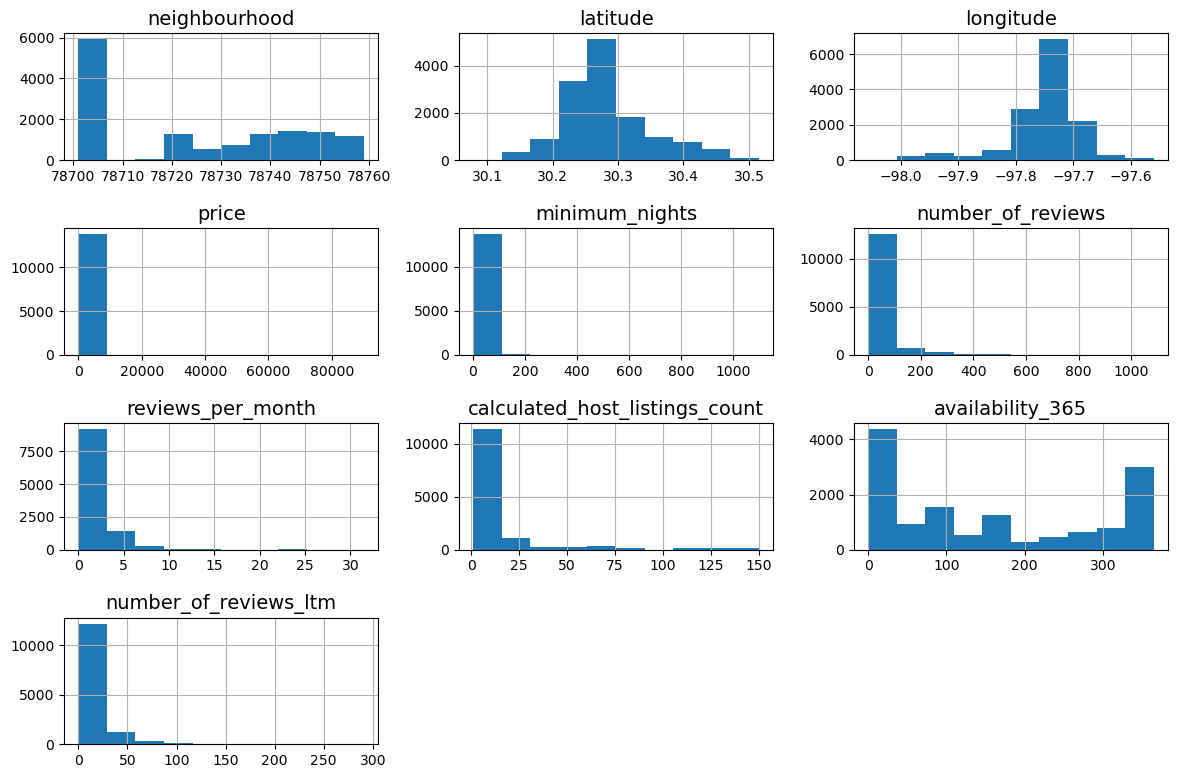

In [9]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=10, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

# Spliting data

## first method

In [10]:
import numpy as np
from zlib import crc32


def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()  # adds an `index` column


housing_with_id["index"] = housing["longitude"] * 1000 + housing["latitude"] #Creating a unique id.
# An element of the data set could be duplicated but with another id thats is why we make our own id.
housing_with_id.head(2)

,index,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,-97777.63915,78746,30.30085,-97.80794,Entire home/apt,495,3,7,0.05,1,363,1
1,-97695.51768,78702,30.27232,-97.72579,Private room,63,2,570,4.36,5,55,45


In [11]:
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
print(len(train_set),len(test_set))

11080 2728


## second method

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set),len(test_set))

11046 2762


# Visualisation

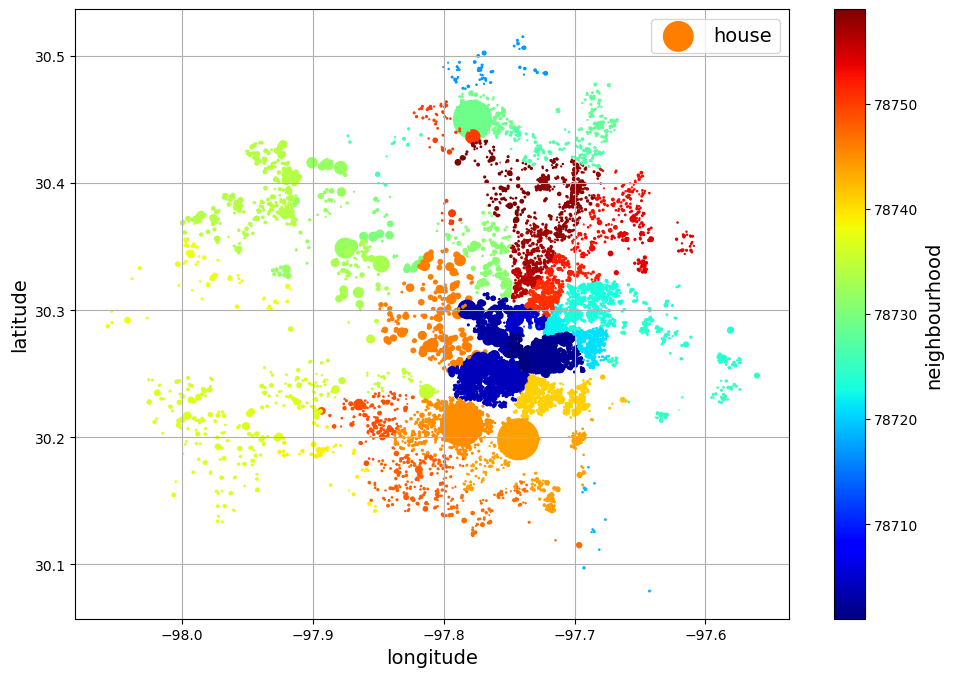

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["price"] / 100, label="house", c="neighbourhood",
              cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

# checking correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix["number_of_reviews"].sort_values(ascending=False)

/tmp/ipykernel_4856/3985814180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


number_of_reviews                 1.000000
number_of_reviews_ltm             0.698297
reviews_per_month                 0.565103
availability_365                  0.058811
longitude                         0.007496
price                            -0.028004
latitude                         -0.032870
minimum_nights                   -0.067687
calculated_host_listings_count   -0.090727
neighbourhood                    -0.099719
Name: number_of_reviews, dtype: float64

# Preparing data for ML algo

In [15]:
housing = train_set.drop("price", axis=1) # removing the information we try to predict
housing_labels = train_set["price"].copy()  # store them in labels

## Cleaning data

In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["reviews_per_month"], inplace=True)    # option 1 remove element

housing.drop("reviews_per_month", axis=1)       # option 2 remove entire column

median = housing["reviews_per_month"].median()  # option 3 fill with median
housing["reviews_per_month"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [17]:
housing_num = housing.select_dtypes(include=[np.number]) 
# forget the non numerical values because they have no mean value.
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [18]:
print(imputer.statistics_)
housing.head(1)

[ 7.87230000e+04  3.02696300e+01 -9.77419026e+01  2.00000000e+00
  7.00000000e+00  1.00000000e+00  2.00000000e+00  1.16000000e+02
  2.00000000e+00]


,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5337,78701,30.27206,-97.74465,Entire home/apt,2,1,0.05,11,38,0


In [19]:
housing_num.median().values

array([ 7.87230000e+04,  3.02696300e+01, -9.77419026e+01,  2.00000000e+00,
        7.00000000e+00,  1.00000000e+00,  2.00000000e+00,  1.16000000e+02,
        2.00000000e+00])

In [20]:
X = imputer.transform(housing_num)
imputer.feature_names_in_

array(['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'], dtype=object)

In [21]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
null_rows_idx = housing.isnull().any(axis=1)
housing_tr.loc[null_rows_idx].head()

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12963,78705.0,30.28803,-97.72715,2.0,0.0,1.0,18.0,167.0,0.0
1459,78722.0,30.28679,-97.71937,1.0,0.0,1.0,1.0,0.0,0.0
6508,78754.0,30.36069,-97.64839,1.0,0.0,1.0,1.0,265.0,0.0
12832,78705.0,30.28842,-97.72688,2.0,0.0,1.0,18.0,167.0,0.0
6472,78747.0,30.15801,-97.74394,2.0,0.0,1.0,4.0,75.0,0.0


In [22]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

outlier_pred

# to drop outliers uncomment this code.

#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

array([1, 1, 1, ..., 1, 1, 1])

# Handling text atributes

In [23]:
housing_cat = housing[["room_type"]]
housing_cat.head(8)

,room_type
5337,Entire home/apt
10063,Entire home/apt
5369,Entire home/apt
9970,Entire home/apt
11273,Entire home/apt
12963,Entire home/apt
1459,Private room
6508,Entire home/apt


In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot # this is a sparse matrix
print(housing_cat_1hot.toarray())

# you can set sparse to false
#cat_encoder = OneHotEncoder(sparse=False)
#housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#housing_cat_1hot

#cat_encoder.categories_

# in case we never saw that category 
cat_encoder.handle_unknown = "ignore"

cat_encoder.get_feature_names_out()

# to apply 
df_output = pd.DataFrame(cat_encoder.transform(housing),
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing.index)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


/home/geekboyboss/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- availability_365
- calculated_host_listings_count
- latitude
- longitude
- minimum_nights
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 10 features, but OneHotEncoder is expecting 1 features as input.

# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))



numerical = housing.select_dtypes(include=[np.number]) 
num_attribs = numerical.columns
cat_attribs = ["room_type"]

# creates a compressed pipeline that splits into text and numerical atributes

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


"""
preprocessing = ColumnTransformer([
    ("neighbourhood", num_pipeline, ["neighbourhood"]),
    ("latitude", num_pipeline, ["latitude"]),
    ("longitude", num_pipeline, ["longitude"]),
    ("minimum_nights", num_pipeline, ["minimum_nights"]),
    ("number_of_reviews", num_pipeline, ["number_of_reviews"]),
    ("reviews_per_month", num_pipeline, ["reviews_per_month"]),
    ("calculated_host_listings_count", num_pipeline, ["calculated_host_listings_count"]),
    ("availability_365", num_pipeline, ["availability_365"]),
    ("number_of_reviews_ltm", num_pipeline, ["number_of_reviews_ltm"]),
    ("room_type", cat_pipeline, cat_attribs),
])
"""

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)


In [ ]:
# extra code – shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head()

,neighbourhood__neighbourhood,latitude__latitude,longitude__longitude,minimum_nights__minimum_nights,number_of_reviews__number_of_reviews,reviews_per_month__reviews_per_month,calculated_host_listings_count__calculated_host_listings_count,availability_365__availability_365,number_of_reviews_ltm__number_of_reviews_ltm,room_type__room_type_Entire home/apt,room_type__room_type_Hotel room,room_type__room_type_Private room,room_type__room_type_Shared room
5337,-1.134348,-0.151568,0.093839,-0.223232,-0.449910,-0.873394,-0.023679,-0.833508,-0.579578,1.0,0.0,0.0,0.0
10063,-1.086060,-0.299636,0.591943,-0.223232,-0.056223,1.393019,-0.369648,1.353117,1.091573,1.0,0.0,0.0,0.0
5369,1.135187,-1.969112,-0.872777,-0.184171,-0.449910,-0.885546,-0.408090,-1.104166,-0.579578,1.0,0.0,0.0,0.0
9970,1.569779,1.298239,0.329215,-0.223232,-0.331804,-0.211091,-0.369648,1.495569,-0.040497,1.0,0.0,0.0,0.0
11273,-0.989484,-0.425710,-0.290696,-0.223232,-0.305558,0.858315,-0.369648,0.056812,0.067319,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('neighbourhood',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['neighbourhood']),
                                                 ('latitude',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['latitude']),
                                                 ('longitude',
                                                  Pipeline(steps=[...
                                                 ('number_of_reviews_ltm',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['number_of_reviews_ltm']),
                                                 ('room_type',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['room_type'])])),
                ('linearregression', LinearRegression())])